## Ch 3 인공신경망 (Artificial Neural Network)

### 데이터 전처리 (preprocessing)

Standardization (표준화) : 표준 정규 분포 등 표준 함수로 변환  
Normalization (정규화) : 0 ~ 1 의 값으로 정규화

In [1]:
import numpy as np

x_train = [1,2,3,4,5,6,7,8]
x_test = [1.2,1.5,3.5,4.5,6.5,7.8]


def normalization(d_train, d_test=None):   # 데이터 정규화 함수
    min_vars = np.min(d_train, axis=0)
    max_vars = np.max(d_train, axis=0)
    if d_test is None:
        return (d_train - min_vars) / (max_vars - min_vars)
    else:
        return (d_train - min_vars) / (max_vars - min_vars), (d_test - min_vars) / (max_vars - min_vars)

def standardization(d_train, d_test=None): # 데이터 표준화 함수
    mean_vars = np.mean(d_train, axis=0)
    std_vars = np.std(d_train, axis=0)
    if d_test is None:
        return (d_train - mean_vars) / std_vars
    else:
        return (d_train - mean_vars) / std_vars, (d_test - mean_vars) / std_vars

# 데이터 정규화 및 표준화 적용
x_train_nrm, x_test_nrm = normalization(x_train, x_test)
x_train_std, x_test_std = standardization(x_train, x_test)
print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

x_train = np.reshape(x_train,(-1,1))

minmax = MinMaxScaler()
x_train_nrm = minmax.fit_transform(x_train)

std = StandardScaler()
x_train_std = std.fit_transform(x_train)

print('max(x_nrm): %.4f \tmin(x_nrm): %.4f'%(np.max(x_train_nrm), np.min(x_train_nrm)))
print('mean(x_std): %.4f\tstd (x_std): %.4f'% (np.mean(x_train_std), np.std (x_train_std)))


max(x_nrm): 1.0000 	min(x_nrm): 0.0000
mean(x_std): 0.0000	std (x_std): 1.0000


## 인공신경망 - Multilayer Perceptron
### 퍼셉트론 및 다층 신경망 (≅ 인공신경망) 구조  
-  단 하나의 직선을 그어 파란색 원과 붉은색 사각형을 분류할 수 있는가?  

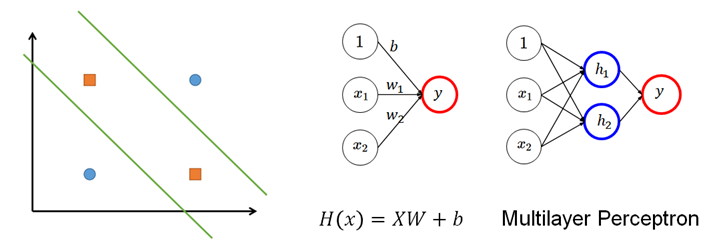


### XOR logic gate 학습 : 로지스틱 회귀분석 vs. MLP
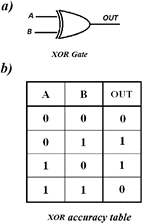

#### 1. 로지스틱 회귀분석

Recall, 로지스틱 회귀분석 

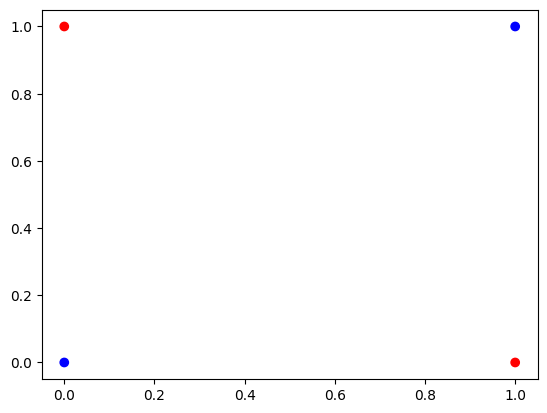

In [14]:
import tensorflow as tf
import matplotlib.pyplot as plt

# 랜덤 시드 설정
tf.random.set_seed(0)

# 데이터 생성
xdata = tf.constant([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=tf.float32)
ydata = tf.constant([[0], [1], [1], [0]], dtype=tf.float32)

# 데이터 시각화
plt.scatter(xdata[:, 0], xdata[:, 1], color=['blue', 'red', 'red', 'blue'])
plt.show()

# 데이터셋 정의
dataset = tf.data.Dataset.from_tensor_slices((xdata, ydata)).batch(len(xdata))

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy
  
# 모델 정의
def model(x):
    hypothesis = tf.divide(1., 1. + tf.exp(-tf.matmul(x, W) + b))  # 로지스틱 회귀
    return hypothesis



#### 모델 학습

In [ ]:
# 훈련 매개변수 및 변수 초기화
EPOCHS = 2000
W = tf.Variable(tf.random.normal([2, 1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, [W, b])
        optimizer.apply_gradients(zip(grads, [W, b]))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
acc = accuracy_fn(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc))


#### 모델 학습 간단한 버전

In [20]:
EPOCHS = 2000
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

# model 생성 - (2개의 input) -> (선형 결합 -> Sigmoid Activation) -> (1개의 output)
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=1, input_shape=(2,), activation='sigmoid')
])
# model 설정 (compile)
model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy', metrics= 'binary_accuracy')

# model 학습
model.fit(xdata, ydata, epochs=2000)



tf.Tensor(0.0, shape=(), dtype=float32)
Accuracy: 0.0000


In [27]:
# Accuracy 확인 (Binary Accuracy - 0.5 기준 확인)
# ex)
# y_true    model(x_data)
# 0            0.4           -> 참
# 1            0.6           -> 참
# 0            0.7           -> 거짓
# 1            0.4           -> 거짓
# Accuracy 2/4 = 0.5

accuracy_fn = tf.keras.metrics.BinaryAccuracy()
accuracy_fn.update_state(ydata, model(xdata))
print("Accuracy:", accuracy_fn.result().numpy())

acc = accuracy_fn(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc))


Accuracy: 0.5
Accuracy: 0.5000


#### 결과 가시화

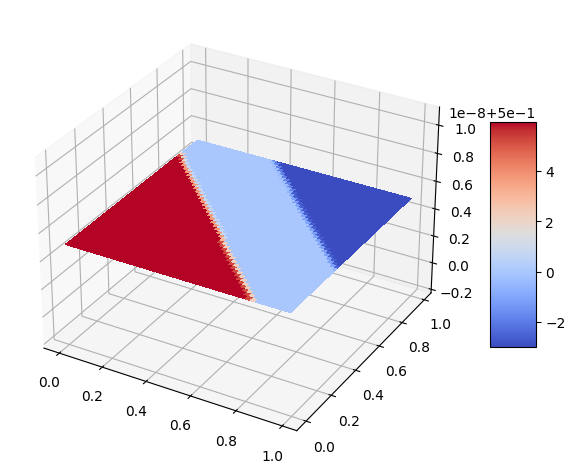

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

#### 인공신경망 - Multilayer perceptron (MLP) 학습
##### 다층 신경망 (단순 선형)
 - Hidden Layer가 있어도 단순 선형 접합이면 최종 계산식에는 Hidden Layer가 없는 것과 동일함  
   
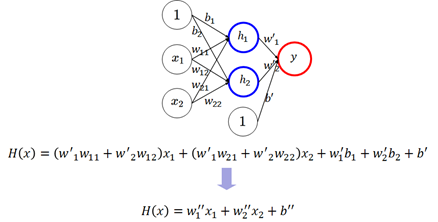


##### 다층 신경망 (비선형 Activation 함수)
 - 비선형 Activation 함수에 의해 Hidden layer의 역할이 보존됨  
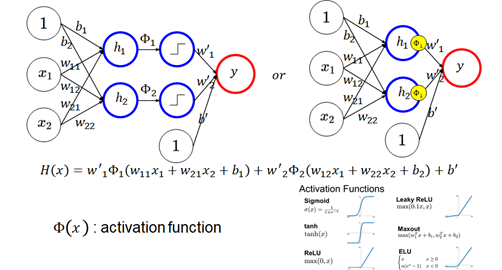

#### 다층 신경망 (MLP)를 이용한 이진 분류
- XOR logtic gate 학습  
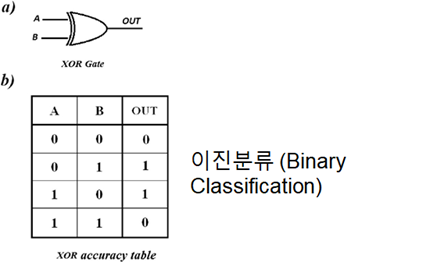
  
- 마지막 Layer에 Sigmoid Activation Function 을 추가로 두어 최종 값의 범위를 0 ~ 1 변환  

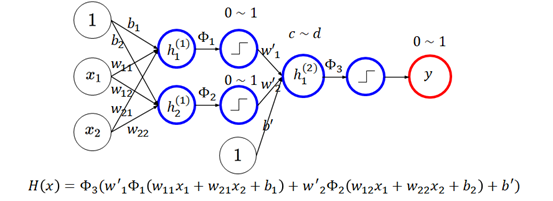

In [24]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2) 
    return hypothesis

# Binary Classification 문제 이기 때문에 Logistic Regression에서 사용했던 Loss, Accuracy 함수 그대로 사용

# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, trainable_vars)
        optimizer.apply_gradients(zip(grads, trainable_vars))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6890
Iter:   200, Loss: 0.6762
Iter:   300, Loss: 0.6413
Iter:   400, Loss: 0.5892
Iter:   500, Loss: 0.5502
Iter:   600, Loss: 0.5273
Iter:   700, Loss: 0.5106
Iter:   800, Loss: 0.4602
Iter:   900, Loss: 0.2892
Iter:  1000, Loss: 0.1524
Iter:  1100, Loss: 0.0936
Iter:  1200, Loss: 0.0658
Iter:  1300, Loss: 0.0503
Iter:  1400, Loss: 0.0405
Iter:  1500, Loss: 0.0338
Iter:  1600, Loss: 0.0289
Iter:  1700, Loss: 0.0253
Iter:  1800, Loss: 0.0224
Iter:  1900, Loss: 0.0201
Iter:  2000, Loss: 0.0183
Iter:  2100, Loss: 0.0167
Iter:  2200, Loss: 0.0154
Iter:  2300, Loss: 0.0143
Iter:  2400, Loss: 0.0133
Iter:  2500, Loss: 0.0124
Iter:  2600, Loss: 0.0117
Iter:  2700, Loss: 0.0110
Iter:  2800, Loss: 0.0104
Iter:  2900, Loss: 0.0099
Iter:  3000, Loss: 0.0094
Accuracy: 1.0000


#### 결과 가시화

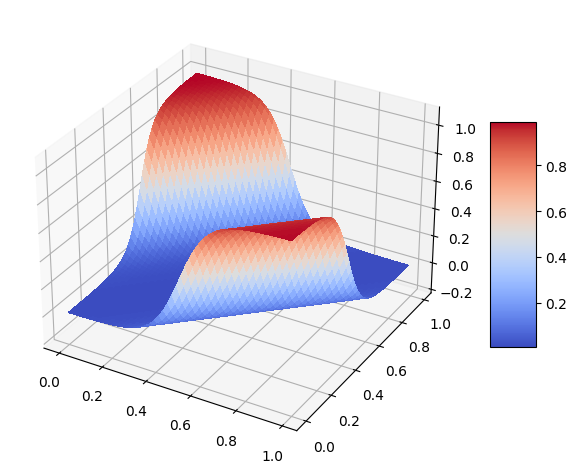

In [25]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### Tensorflow model을 활용한 간단한 MLP 모델 구현


In [30]:
# # 이전 세션 클리어
tf.keras.backend.clear_session()

# model의 input_shape = (2,)
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

 model.summary()
# 훈련 설정
EPOCHS = 3000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            #실제 model의 input data의 차원 (4, 2) = (batch size, input_shape)
            #Tensorflow의 model은 기본적으로 batch가 있을 것을 가정하고 구현됨.
            pred = model(x)
            loss = loss_fn(labels, pred)
            
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))     

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6678
Iter:   200, Loss: 0.6240
Iter:   300, Loss: 0.5565
Iter:   400, Loss: 0.4773
Iter:   500, Loss: 0.3438
Iter:   600, Loss: 0.1976
Iter:   700, Loss: 0.1186
Iter:   800, Loss: 0.0804
Iter:   900, Loss: 0.0596
Iter:  1000, Loss: 0.0469
Iter:  1100, Loss: 0.0385
Iter:  1200, Loss: 0.0326
Iter:  1300, Loss: 0.0281
Iter:  1400, Loss: 0.0247
Iter:  1500, Loss: 0.0221
Iter:  1600, Loss: 0.0199
Iter:  1700, Loss: 0.0181
Iter:  1800, Loss: 0.0166
Iter:  1900, Loss: 0.0153
Iter:  2000, Loss: 0.0142
Iter:  2100, Loss: 0.0132
Iter:  2200, Loss: 0.0124
Iter:  2300, Loss: 0.0117
Iter:  2400, Loss: 0.0110
Iter:  2500, Loss: 0.0104
Iter:  2600, Loss: 0.0099
Iter:  2700, Loss: 0.0094
Iter:  2800, Loss: 0.0090
Iter:  2900, Loss: 0.0086
Iter:  3000, Loss: 0.0082
Accuracy: 1.0000


(100, 100) (100, 100)
(10000, 2)


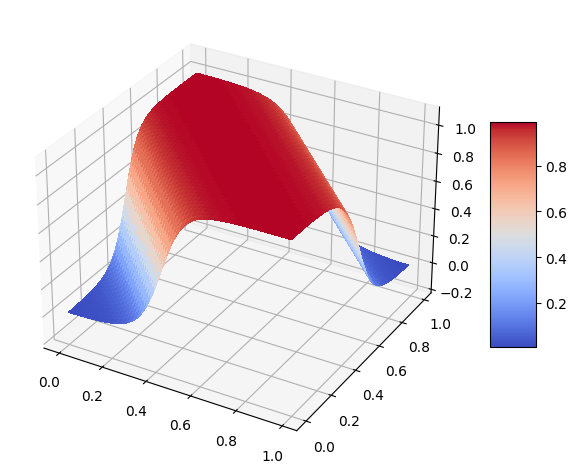

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)
#print(X1.shape, X2.shape)

# 모델 적용
#print(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).shape)
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


### Tensorflow model 설정
Tensorflow를 이용한 3가지 MLP 모델 정의 방법

1. Model 구현 방법  
1.1. Model을 세부적인 내용 까지 모두 구현

In [6]:
# 가중치와 편향 초기화
W1 = tf.Variable(tf.random.normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random.normal([2]), name='bias1')
W2 = tf.Variable(tf.random.normal([2, 1]), name='weight2')
b2 = tf.Variable(tf.random.normal([1]), name='bias2')

# 훈련 가능한 변수 목록
trainable_vars = [W1, b1, W2, b2]

# 모델 정의
def model(x):
    l1 = tf.sigmoid(tf.matmul(x, W1) + b1)
    hypothesis = tf.sigmoid(tf.matmul(l1, W2) + b2)  # 수정: l1을 사용
    retu

# 손실 함수 정의
def loss_fn(y_true, y_pred):
    cost = -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))
    return cost

# 정확도 함수 정의
def accuracy_fn(y_true, y_pred):
    predicted = tf.cast(y_pred > 0.5, dtype=tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, y_true), dtype=tf.float32))
    return accuracy


  1.2. Model을 Tensorflow 함수를 이용해서 간단하게 정의

In [57]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])

#손실 함수 정의
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 정확도 함수 정의
accuracy_fn = tf.keras.metrics.BinaryAccuracy()
#accuracy_fn.updates_state(y_true, y_pred)
#accuracy_fn.result().numpy()

1.3 Class를 이용한 Model 정의

In [54]:
class dnnmodel(tf.keras.Model):
    def __init__(self):
        super(dnnmodel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(units=2, activation = 'sigmoid')
        self.dense2 = tf.keras.layers.Dense(units=1, activation = 'sigmoid')

    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return x

model = dnnmodel()
#손실 함수 정의
loss_fn = tf.keras.losses.BinaryCrossentropy()

# 정확도 함수 정의
accuracy_fn = tf.keras.metrics.BinaryAccuracy()
#accuracy_fn.updates_state(y_true, y_pred)
#accuracy_fn.result().numpy()

2. Model 학습  
2.1. GradientTape을 이용한 모델 학습

In [39]:

# 훈련 설정
EPOCHS = 2000
optimizer = tf.keras.optimizers.SGD(learning_rate=0.5)

# 훈련 루프
for step in range(EPOCHS):
    for x, labels in dataset:
        with tf.GradientTape() as tape:
            pred = model(x)
            loss = loss_fn(labels, pred)
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
    
    if (step + 1) % 100 == 0:
        print("Iter: {:5}, Loss: {:5.4f}".format(step + 1, loss))
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


Iter:   100, Loss: 0.6143
Iter:   200, Loss: 0.5650
Iter:   300, Loss: 0.5237
Iter:   400, Loss: 0.4784
Iter:   500, Loss: 0.4030
Iter:   600, Loss: 0.2952
Iter:   700, Loss: 0.2033
Iter:   800, Loss: 0.1455
Iter:   900, Loss: 0.1103
Iter:  1000, Loss: 0.0876
Iter:  1100, Loss: 0.0722
Iter:  1200, Loss: 0.0612
Iter:  1300, Loss: 0.0529
Iter:  1400, Loss: 0.0465
Iter:  1500, Loss: 0.0414
Iter:  1600, Loss: 0.0373
Iter:  1700, Loss: 0.0340
Iter:  1800, Loss: 0.0311
Iter:  1900, Loss: 0.0287
Iter:  2000, Loss: 0.0266
Accuracy: 0.8750


2.2. fit 함수를 통한 학습과정까지 단순화

In [55]:
sgd_optimizer = tf.keras.optimizers.SGD(0.5)

model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy', metrics= 'binary_accuracy')

model.fit(xdata, ydata, epochs=2000)

acc = tf.keras.metrics.BinaryAccuracy()        
acc.update_state(ydata, model(xdata))
print("Accuracy: {:.4f}".format(acc.result().numpy()))


Epoch 1/2000
1/1 [==============================] - 0s 354ms/step - loss: 0.7274 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.7138 - binary_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.7056 - binary_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7007 - binary_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6978 - binary_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6961 - binary_accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6951 - binary_accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6944 - binary_accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6941 - binary_accuracy: 0.5000
Epoch 10/2000
1/1 [============================

1/1 [==============================] - 0s 11ms/step - loss: 0.6914 - binary_accuracy: 0.7500
Epoch 155/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6914 - binary_accuracy: 0.7500
Epoch 156/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6913 - binary_accuracy: 0.7500
Epoch 157/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6913 - binary_accuracy: 0.7500
Epoch 158/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6913 - binary_accuracy: 0.7500
Epoch 159/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6912 - binary_accuracy: 0.7500
Epoch 160/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6912 - binary_accuracy: 0.7500
Epoch 161/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6912 - binary_accuracy: 0.7500
Epoch 162/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6911 - binary_accuracy: 0.7500
Epoch 163/2000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 0.6732 - binary_accuracy: 0.7500
Epoch 307/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6730 - binary_accuracy: 0.7500
Epoch 308/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6727 - binary_accuracy: 0.7500
Epoch 309/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6725 - binary_accuracy: 0.7500
Epoch 310/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6722 - binary_accuracy: 0.7500
Epoch 311/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6719 - binary_accuracy: 0.7500
Epoch 312/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6717 - binary_accuracy: 0.7500
Epoch 313/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6714 - binary_accuracy: 0.7500
Epoch 314/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6712 - binary_accuracy: 0.7500
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 8ms/step - loss: 0.6012 - binary_accuracy: 0.7500
Epoch 459/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6005 - binary_accuracy: 0.7500
Epoch 460/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5998 - binary_accuracy: 0.7500
Epoch 461/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5991 - binary_accuracy: 0.7500
Epoch 462/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5983 - binary_accuracy: 0.7500
Epoch 463/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.5976 - binary_accuracy: 0.7500
Epoch 464/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5969 - binary_accuracy: 0.7500
Epoch 465/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5962 - binary_accuracy: 0.7500
Epoch 466/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5955 - binary_accuracy: 0.7500
Epoch 467/2000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.4754 - binary_accuracy: 0.7500
Epoch 611/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4743 - binary_accuracy: 0.7500
Epoch 612/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4732 - binary_accuracy: 0.7500
Epoch 613/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4721 - binary_accuracy: 0.7500
Epoch 614/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4710 - binary_accuracy: 0.7500
Epoch 615/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4699 - binary_accuracy: 0.7500
Epoch 616/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4688 - binary_accuracy: 0.7500
Epoch 617/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.4677 - binary_accuracy: 0.7500
Epoch 618/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.4666 - binary_accuracy: 0.7500
Epoch 619/2000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.2503 - binary_accuracy: 1.0000
Epoch 763/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2488 - binary_accuracy: 1.0000
Epoch 764/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2474 - binary_accuracy: 1.0000
Epoch 765/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2460 - binary_accuracy: 1.0000
Epoch 766/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.2446 - binary_accuracy: 1.0000
Epoch 767/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2431 - binary_accuracy: 1.0000
Epoch 768/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.2417 - binary_accuracy: 1.0000
Epoch 769/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2403 - binary_accuracy: 1.0000
Epoch 770/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2389 - binary_accuracy: 1.0000
Epoch 771/2000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 0.1131 - binary_accuracy: 1.0000
Epoch 915/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1126 - binary_accuracy: 1.0000
Epoch 916/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1121 - binary_accuracy: 1.0000
Epoch 917/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1117 - binary_accuracy: 1.0000
Epoch 918/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1112 - binary_accuracy: 1.0000
Epoch 919/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1107 - binary_accuracy: 1.0000
Epoch 920/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.1102 - binary_accuracy: 1.0000
Epoch 921/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1098 - binary_accuracy: 1.0000
Epoch 922/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1093 - binary_accuracy: 1.0000
Epoch 923/2000
1/1 [==============================]

1/1 [==============================] - 0s 13ms/step - loss: 0.0662 - binary_accuracy: 1.0000
Epoch 1067/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0660 - binary_accuracy: 1.0000
Epoch 1068/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0658 - binary_accuracy: 1.0000
Epoch 1069/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0656 - binary_accuracy: 1.0000
Epoch 1070/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0654 - binary_accuracy: 1.0000
Epoch 1071/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0652 - binary_accuracy: 1.0000
Epoch 1072/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0650 - binary_accuracy: 1.0000
Epoch 1073/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0648 - binary_accuracy: 1.0000
Epoch 1074/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0647 - binary_accuracy: 1.0000
Epoch 1075/2000
1/1 [====================

1/1 [==============================] - 0s 7ms/step - loss: 0.0457 - binary_accuracy: 1.0000
Epoch 1217/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0456 - binary_accuracy: 1.0000
Epoch 1218/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0455 - binary_accuracy: 1.0000
Epoch 1219/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0454 - binary_accuracy: 1.0000
Epoch 1220/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.0454 - binary_accuracy: 1.0000
Epoch 1221/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0453 - binary_accuracy: 1.0000
Epoch 1222/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0452 - binary_accuracy: 1.0000
Epoch 1223/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0451 - binary_accuracy: 1.0000
Epoch 1224/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0450 - binary_accuracy: 1.0000
Epoch 1225/2000
1/1 [====================

Epoch 1367/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0345 - binary_accuracy: 1.0000
Epoch 1368/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0345 - binary_accuracy: 1.0000
Epoch 1369/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - binary_accuracy: 1.0000
Epoch 1370/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0344 - binary_accuracy: 1.0000
Epoch 1371/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0343 - binary_accuracy: 1.0000
Epoch 1372/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0343 - binary_accuracy: 1.0000
Epoch 1373/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0342 - binary_accuracy: 1.0000
Epoch 1374/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1375/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0341 - binary_accuracy: 1.0000
Epoch 1376/2000
1/1 [====

1/1 [==============================] - 0s 10ms/step - loss: 0.0276 - binary_accuracy: 1.0000
Epoch 1518/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0276 - binary_accuracy: 1.0000
Epoch 1519/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0276 - binary_accuracy: 1.0000
Epoch 1520/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0275 - binary_accuracy: 1.0000
Epoch 1521/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0275 - binary_accuracy: 1.0000
Epoch 1522/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0275 - binary_accuracy: 1.0000
Epoch 1523/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0274 - binary_accuracy: 1.0000
Epoch 1524/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0274 - binary_accuracy: 1.0000
Epoch 1525/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0274 - binary_accuracy: 1.0000
Epoch 1526/2000
1/1 [=====================

Epoch 1668/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0230 - binary_accuracy: 1.0000
Epoch 1669/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0229 - binary_accuracy: 1.0000
Epoch 1670/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0229 - binary_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0229 - binary_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0229 - binary_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0228 - binary_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0228 - binary_accuracy: 1.0000
Epoch 1675/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0228 - binary_accuracy: 1.0000
Epoch 1676/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0227 - binary_accuracy: 1.0000
Epoch 1677/2000
1/1 [======

1/1 [==============================] - 0s 8ms/step - loss: 0.0196 - binary_accuracy: 1.0000
Epoch 1819/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0196 - binary_accuracy: 1.0000
Epoch 1820/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0196 - binary_accuracy: 1.0000
Epoch 1821/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0196 - binary_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 1825/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 1826/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0195 - binary_accuracy: 1.0000
Epoch 1827/2000
1/1 [=======================

Epoch 1894/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1895/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1896/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1897/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1898/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1899/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1900/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0182 - binary_accuracy: 1.0000
Epoch 1901/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 1902/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0181 - binary_accuracy: 1.0000
Epoch 1903/2000
1/1 [======

현재 많이 사용되고 있는 단순한 형태의 모델

In [58]:
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])
# Optimizer 정의
sgd_optimizer = tf.keras.optimizers.SGD(0.5)

#모델 설정
model.compile(optimizer=sgd_optimizer,loss='binary_crossentropy', metrics= 'binary_accuracy')

#모델 학습
model.fit(xdata, ydata, epochs=2000)

acc = tf.keras.metrics.BinaryAccuracy()
result = acc(ydata, model(xdata))
print("Accuracy: {:.4f}".format(result))

Epoch 1/2000
1/1 [==============================] - 1s 571ms/step - loss: 0.7496 - binary_accuracy: 0.5000
Epoch 2/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7303 - binary_accuracy: 0.5000
Epoch 3/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7176 - binary_accuracy: 0.5000
Epoch 4/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.7092 - binary_accuracy: 0.5000
Epoch 5/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.7037 - binary_accuracy: 0.5000
Epoch 6/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.7001 - binary_accuracy: 0.5000
Epoch 7/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6978 - binary_accuracy: 0.5000
Epoch 8/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6962 - binary_accuracy: 0.5000
Epoch 9/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6952 - binary_accuracy: 0.5000
Epoch 10/2000
1/1 [==============================]

1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 155/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 156/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 157/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 158/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 159/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 160/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 161/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 162/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 163/2000
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 307/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 308/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 309/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 310/2000
1/1 [==============================] - 0s 5ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 311/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 312/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 313/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 314/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6932 - binary_accuracy: 0.5000
Epoch 315/2000
1/1 [==============================] 

1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 459/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 460/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 461/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 462/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 463/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 464/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 465/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 466/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 467/2000
1/1 [=============================

1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 611/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 612/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 613/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 614/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 615/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 616/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 617/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 618/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6931 - binary_accuracy: 0.5000
Epoch 619/2000
1/1 [==============================

1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 763/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 764/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 765/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 766/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 767/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 768/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 769/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 770/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6930 - binary_accuracy: 0.5000
Epoch 771/2000
1/1 [==============================] 

1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 915/2000
1/1 [==============================] - 0s 6ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 916/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 917/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 918/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 919/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 920/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 921/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 922/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6927 - binary_accuracy: 0.5000
Epoch 923/2000
1/1 [==============================] 

1/1 [==============================] - 0s 9ms/step - loss: 0.6918 - binary_accuracy: 0.5000
Epoch 1067/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6918 - binary_accuracy: 0.5000
Epoch 1068/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6918 - binary_accuracy: 0.5000
Epoch 1069/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6918 - binary_accuracy: 0.5000
Epoch 1070/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 1071/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 1072/2000
1/1 [==============================] - 0s 13ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 1073/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 1074/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6917 - binary_accuracy: 0.5000
Epoch 1075/2000
1/1 [================

1/1 [==============================] - 0s 9ms/step - loss: 0.6874 - binary_accuracy: 0.5000
Epoch 1217/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6874 - binary_accuracy: 0.5000
Epoch 1218/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6873 - binary_accuracy: 0.5000
Epoch 1219/2000
1/1 [==============================] - 0s 12ms/step - loss: 0.6873 - binary_accuracy: 0.5000
Epoch 1220/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.6872 - binary_accuracy: 0.5000
Epoch 1221/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6871 - binary_accuracy: 0.5000
Epoch 1222/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6871 - binary_accuracy: 0.5000
Epoch 1223/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6870 - binary_accuracy: 0.5000
Epoch 1224/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6869 - binary_accuracy: 0.5000
Epoch 1225/2000
1/1 [===================

1/1 [==============================] - 0s 8ms/step - loss: 0.6598 - binary_accuracy: 0.7500
Epoch 1367/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6594 - binary_accuracy: 0.7500
Epoch 1368/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6590 - binary_accuracy: 0.7500
Epoch 1369/2000
1/1 [==============================] - 0s 7ms/step - loss: 0.6586 - binary_accuracy: 0.7500
Epoch 1370/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6582 - binary_accuracy: 0.7500
Epoch 1371/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6578 - binary_accuracy: 0.7500
Epoch 1372/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.6574 - binary_accuracy: 0.7500
Epoch 1373/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.6570 - binary_accuracy: 0.7500
Epoch 1374/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.6566 - binary_accuracy: 0.7500
Epoch 1375/2000
1/1 [======================

1/1 [==============================] - 0s 7ms/step - loss: 0.5505 - binary_accuracy: 0.7500
Epoch 1517/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5493 - binary_accuracy: 0.7500
Epoch 1518/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5481 - binary_accuracy: 0.7500
Epoch 1519/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5469 - binary_accuracy: 0.7500
Epoch 1520/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5457 - binary_accuracy: 0.7500
Epoch 1521/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5445 - binary_accuracy: 0.7500
Epoch 1522/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.5433 - binary_accuracy: 0.7500
Epoch 1523/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.5421 - binary_accuracy: 0.7500
Epoch 1524/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.5408 - binary_accuracy: 0.7500
Epoch 1525/2000
1/1 [=====================

1/1 [==============================] - 0s 8ms/step - loss: 0.2685 - binary_accuracy: 1.0000
Epoch 1667/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2667 - binary_accuracy: 1.0000
Epoch 1668/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2649 - binary_accuracy: 1.0000
Epoch 1669/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2631 - binary_accuracy: 1.0000
Epoch 1670/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2613 - binary_accuracy: 1.0000
Epoch 1671/2000
1/1 [==============================] - 0s 11ms/step - loss: 0.2595 - binary_accuracy: 1.0000
Epoch 1672/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2577 - binary_accuracy: 1.0000
Epoch 1673/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.2560 - binary_accuracy: 1.0000
Epoch 1674/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.2543 - binary_accuracy: 1.0000
Epoch 1675/2000
1/1 [====================

1/1 [==============================] - 0s 11ms/step - loss: 0.1128 - binary_accuracy: 1.0000
Epoch 1817/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1123 - binary_accuracy: 1.0000
Epoch 1818/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1118 - binary_accuracy: 1.0000
Epoch 1819/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1113 - binary_accuracy: 1.0000
Epoch 1820/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1108 - binary_accuracy: 1.0000
Epoch 1821/2000
1/1 [==============================] - 0s 8ms/step - loss: 0.1103 - binary_accuracy: 1.0000
Epoch 1822/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1098 - binary_accuracy: 1.0000
Epoch 1823/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.1093 - binary_accuracy: 1.0000
Epoch 1824/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.1089 - binary_accuracy: 1.0000
Epoch 1825/2000
1/1 [=====================

1/1 [==============================] - 0s 9ms/step - loss: 0.0654 - binary_accuracy: 1.0000
Epoch 1967/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0652 - binary_accuracy: 1.0000
Epoch 1968/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0650 - binary_accuracy: 1.0000
Epoch 1969/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0648 - binary_accuracy: 1.0000
Epoch 1970/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0646 - binary_accuracy: 1.0000
Epoch 1971/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0645 - binary_accuracy: 1.0000
Epoch 1972/2000
1/1 [==============================] - 0s 10ms/step - loss: 0.0643 - binary_accuracy: 1.0000
Epoch 1973/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0641 - binary_accuracy: 1.0000
Epoch 1974/2000
1/1 [==============================] - 0s 9ms/step - loss: 0.0639 - binary_accuracy: 1.0000
Epoch 1975/2000
1/1 [======================

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# 3D 그래프 생성
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 데이터 생성
x1 = np.arange(0, 1, 0.01)
x2 = np.arange(0, 1, 0.01)
X1, X2 = np.meshgrid(x1, x2)

# 모델 적용
h = model(np.hstack((X1.reshape(-1, 1), X2.reshape(-1, 1))).astype(np.float32))
H = h.numpy().reshape(100, 100)

# 표면 그래프 그리기
surf = ax.plot_surface(X1, X2, H, cmap='coolwarm', linewidth=0, antialiased=False)
ax.set_zlim(-0.2, 1.1)
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()


#### Tensorflow Model 설정
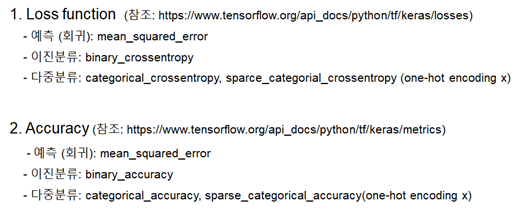

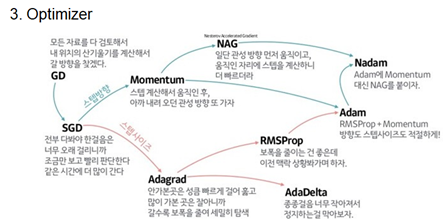

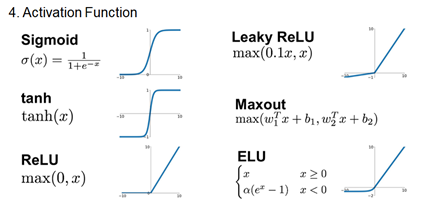

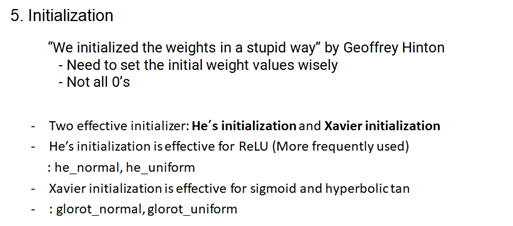

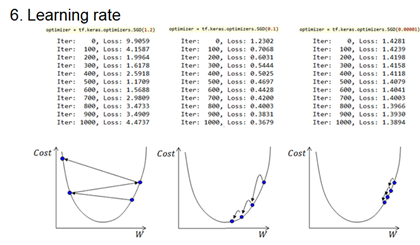

In [ ]:
# Learning rate 
# 모델 정의
model = tf.keras.models.Sequential([   
     tf.keras.layers.Dense(units=2,activation='sigmoid',
                              input_shape=(xdata.shape[1],)),
     tf.keras.layers.Dense(units=1, activation='sigmoid')
])


# 훈련 설정
EPOCHS = 2000
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.0001) # Learning rate이 작아서 학습 속도가 느림
#optimizer = tf.keras.optimizers.SGD(learning_rate=0.5) # 적절한 수준
#optimizer = tf.keras.optimizers.SGD(learning_rate=10) # 모델이 단순해서 overfitting이 일어나지 않음

# Learning rate 감소
Initial_learning_rate = 10.
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(Initial_learning_rate, 
                                                             decay_steps=100, 
                                                             decay_rate = 0.96, 
                                                             staircase=True)
optimizer = tf.keras.optimizers.SGD(lr_schedule)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics= 'binary_accuracy')
model.fit(xdata, ydata, epochs = 2000)
        

acc = accuracy_fn(ydata, model(xdata))

print("Accuracy: {:.4f}".format(acc))


### 실습. Stress-Strain Curve Fitting
Hot compression test의 Stress-Strain 데이터를 15차 다항식으로 fitting

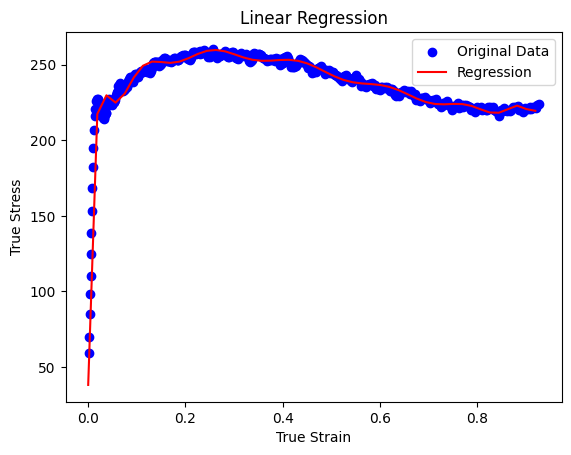

In [84]:
from sklearn.linear_model import LinearRegression 
from sklearn.preprocessing import PolynomialFeatures

train_data = np.loadtxt('stress_strain_data.csv',delimiter=',')
x_data = train_data[:,0]
y_data = train_data[:,1]
x_data = np.reshape(x_data,(-1,1)) 
y_data = np.reshape(y_data,(-1,1)) 

poly_f = PolynomialFeatures(degree=15, include_bias=False)
x_poly = poly_f.fit_transform(x_data)
linear_regression_model = LinearRegression()  
linear_regression_model.fit(x_poly, y_data)

plt.scatter(x_data, y_data, color='blue' ,label='Original Data') 
x_data2 = np.linspace(0, 0.92, num = 50)
x_data2 = np.reshape(x_data2, (-1,1))
x_poly2 = poly_f.fit_transform(x_data2)

y_pred = linear_regression_model.predict(x_poly2)
plt.plot(x_data2, y_pred, color = 'red', label='Regression')
plt.title('Linear Regression')
plt.xlabel('True Strain')
plt.ylabel('True Stress')
plt.legend()


### 실습. Stress-Strain Curve Fitting
Hot compression test의 Stress-Strain 데이터를 ANN으로 Fitting 해보시오
